<a href="https://colab.research.google.com/github/AnnAnsas/Pet-Project/blob/main/HW_kaggle_annanas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Первая часть. Исследование*** 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.metrics import roc_auc_score

 **Загрузка данных**

In [ ]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 94.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 69.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 13.6MB/s]


In [ ]:
data = pd.read_csv('./train.csv')

In [ ]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

'TotalSpent' имеет тип 'object', но подразумевается тип 'float64'. Выполню преобразование

In [ ]:
data['TotalSpent'] = pd.to_numeric(data.TotalSpent.str.strip())

In [ ]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Исследую пропуски

In [ ]:
data[data['TotalSpent'].isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,NaN,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,NaN,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,NaN,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,NaN,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,NaN,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,NaN,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,NaN,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Выше приведены данные новых клиентов. Их можно выкинуть, но я, пожалуй, заменю пропуски на значения 'MonthlySpending'

In [ ]:
data.loc[data['TotalSpent'].isna(), 'TotalSpent'] = data.loc[data['TotalSpent'].isna(), 'MonthlySpending']

Проверю данные на дупликаты, в том числе без учета таргета

In [ ]:
data.duplicated(subset=list(data.columns[:-1])).sum()

22

Избавлюсь от дупликатов

In [ ]:
data.drop_duplicates(subset=list(data.columns[:-1]), keep='last', inplace=True)

 **Анализ данных**

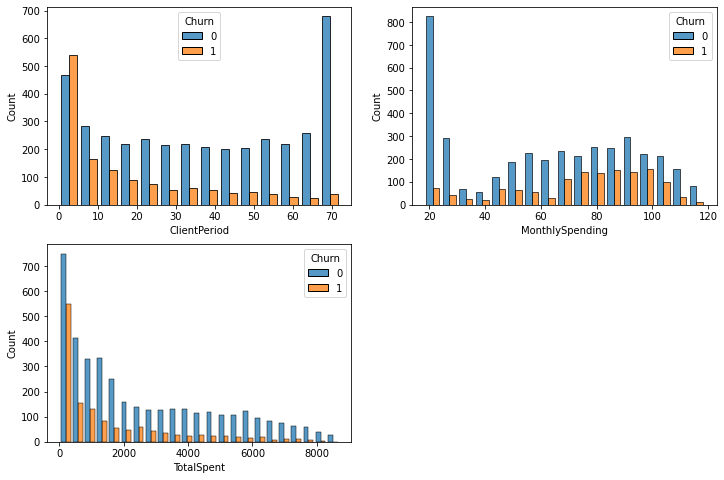

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot( x=col, hue = 'Churn', multiple="dodge", shrink=.8, data=data)

По графикам видно, что чаще уходят новые клиенты, так же те, что мало тратят, и примерно равномерно распределены ухдящие по их месячным тратам

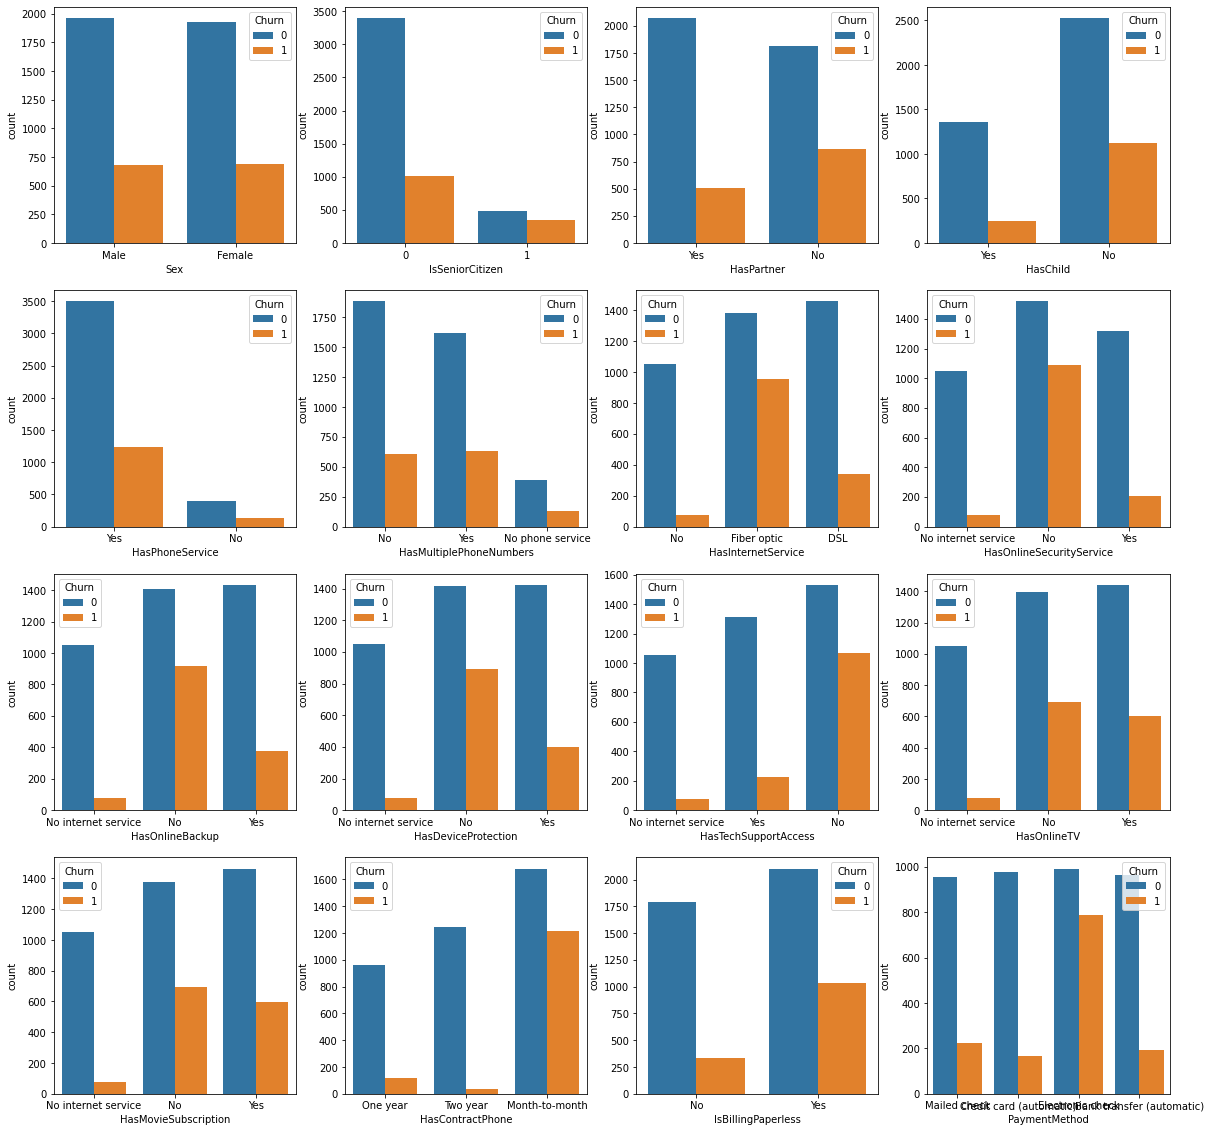

In [ ]:
plt.figure(figsize=(20, 20))

for i, col in enumerate(cat_cols):
    plt.subplot(4, 4, i+1)
    sns.countplot(x = col, data = data, hue = 'Churn')

Чаще уходят люди с PaymentMethod - Electronic check, HasContractPhone - Month-to-month, HasTechSupportAccess - No, HasOnlineSecurityService - No, HasInternetService - FiberOptic.
Углубляться в анализ этих категорий не буду, так как задачи сохранить тех или иных клиентов перед мной не стоит. 
Так же на данном этапе не было выявлено никаких выбросов, потому можно двигаться дальше

# ***Вторая часть. Преобразование тестовых данных***

In [ ]:
test_data = pd.read_csv('test.csv')

Сделаю всё то же самое, что и с train data выше

In [ ]:
#test_data['TotalSpent'] = pd.to_numeric(test_data.TotalSpent.str.strip())
test_data.loc[test_data['TotalSpent'].isna(), 'TotalSpent'] = test_data.loc[test_data['TotalSpent'].isna(), 'MonthlySpending']
test_data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,32.293583,64.272601,2256.505906,0.170358
std,24.593736,29.832517,2260.479152,0.376054
min,0.000000,18.550000,18.850000,0.000000
25%,9.000000,35.650000,405.600000,0.000000
50%,29.000000,70.050000,1356.300000,0.000000
75%,56.000000,89.400000,3759.050000,0.000000
max,72.000000,117.350000,8496.700000,1.000000


# ***Третья часть.Применение линейных моделей*** 

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
prep = ColumnTransformer([
    ('num', StandardScaler(), num_cols), 
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse = False, drop='if_binary'), cat_cols)],
     verbose_feature_names_out = False)

steps = [('CT', prep) ,('LReg', LogisticRegression(max_iter = 100))] 

pipeline = Pipeline(steps)

params = {
    'LReg__C':np.linspace(25, 30, 10), 
    'LReg__penalty':['l2'],#['l1','l2'],
    'LReg__solver':['saga'], #['lbfgs', 'liblinear', 'saga'], 
    'LReg__random_state':[42]
}

LR = GridSearchCV(pipeline, params, cv=5, verbose=10, n_jobs=-1, scoring='roc_auc')
LR.fit(data.drop(target_col, axis='columns'), data[target_col])
LR.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


{'LReg__C': 25.0,
 'LReg__penalty': 'l2',
 'LReg__random_state': 42,
 'LReg__solver': 'saga'}

Были рассмторены параметры 'C':np.linspace(0.01, 50, 100),'penalty':'l1','l2',
'solver':'lbfgs', 'liblinear', 'saga', 
Лучшими параметрами оказались 'C': 25.0, 'penalty': 'l2', 'solver': 'saga'

In [ ]:
pd.DataFrame(LR.cv_results_).sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LReg__C,param_LReg__penalty,param_LReg__random_state,param_LReg__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.012702,0.198511,0.036553,0.014262,25.0,l2,42,saga,"{'LReg__C': 25.0, 'LReg__penalty': 'l2', 'LReg...",0.861384,0.838544,0.835598,0.856130,0.835634,0.845458,0.011037,1
3,0.543344,0.017256,0.023093,0.001778,26.666667,l2,42,saga,"{'LReg__C': 26.666666666666668, 'LReg__penalty...",0.861384,0.838553,0.835583,0.856116,0.835643,0.845456,0.011034,2
5,0.522588,0.008921,0.020136,0.000610,27.777778,l2,42,saga,"{'LReg__C': 27.77777777777778, 'LReg__penalty'...",0.861398,0.838548,0.835588,0.856102,0.835643,0.845456,0.011035,3
9,0.707710,0.260887,0.025809,0.014134,30.0,l2,42,saga,"{'LReg__C': 30.0, 'LReg__penalty': 'l2', 'LReg...",0.861394,0.838553,0.835593,0.856074,0.835666,0.845456,0.011023,4
4,0.549530,0.025990,0.020745,0.000908,27.222222,l2,42,saga,"{'LReg__C': 27.22222222222222, 'LReg__penalty'...",0.861389,0.838548,0.835583,0.856111,0.835638,0.845454,0.011036,5


In [ ]:
y_train_predict = LR.predict_proba(data.drop(target_col, axis='columns'))
y_test_predict = LR.predict_proba(test_data)

roc_auc_score(data[target_col], y_train_predict[:,1])

0.8491481049900607

In [ ]:
submission_1 = pd.read_csv('/content/submission.csv', index_col='Id')

submission_1['Churn'] = y_test_predict[:,1]
submission_1.to_csv('Annanas_LR_1.csv')

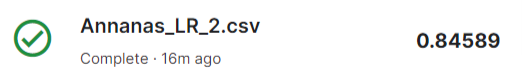

# ***Четвертая часть. Градиентный бустинг***

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier, Pool, cv

In [ ]:
datapool = Pool(data=data.drop(target_col, axis='columns'), label=data[target_col], cat_features=cat_cols)

In [ ]:
fix_params = {"iterations": 100,
              "loss_function": "Logloss",
              "custom_loss": "AUC:hints=skip_train~false",
              'eval_metric': 'AUC:hints=skip_train~false',
              "verbose": 0}

params = {"depth": [2, 3, 4, 5],
          'learning_rate': np.linspace(0.01, 0.1, 20),
          'l2_leaf_reg': [3.75],
          'min_data_in_leaf': np.arange(1, 4) 
          }

cat = CatBoostClassifier(**fix_params)
scores = cat.grid_search(params, datapool, cv=10)

In [ ]:
fix_params['iterations'] = 300
kitty_cat = CatBoostClassifier(**fix_params, **scores['params'])
kitty_cat.fit(datapool)
roc_auc_score(data[target_col], kitty_cat.predict_proba(datapool)[:,1])

0.8804438972890865

In [ ]:
submission = pd.read_csv('submission.csv', index_col='Id')
submission['Churn'] = kitty_cat.predict_proba(test_data)[:,1]
submission.to_csv('Annanas_cat.csv')

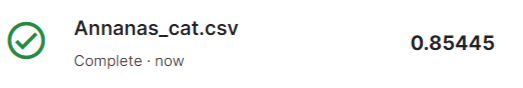